In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
from sklearn.preprocessing import StandardScaler ,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Salary Data

In [2]:
df = pd.read_csv(r"C:\Users\shree\Desktop\subject\Data_Science\DS_Assignments\Datasets\Salary_Data.csv")

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
df.shape

(30, 2)

In [6]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

### Descriptive Statistics

In [7]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<Axes: >

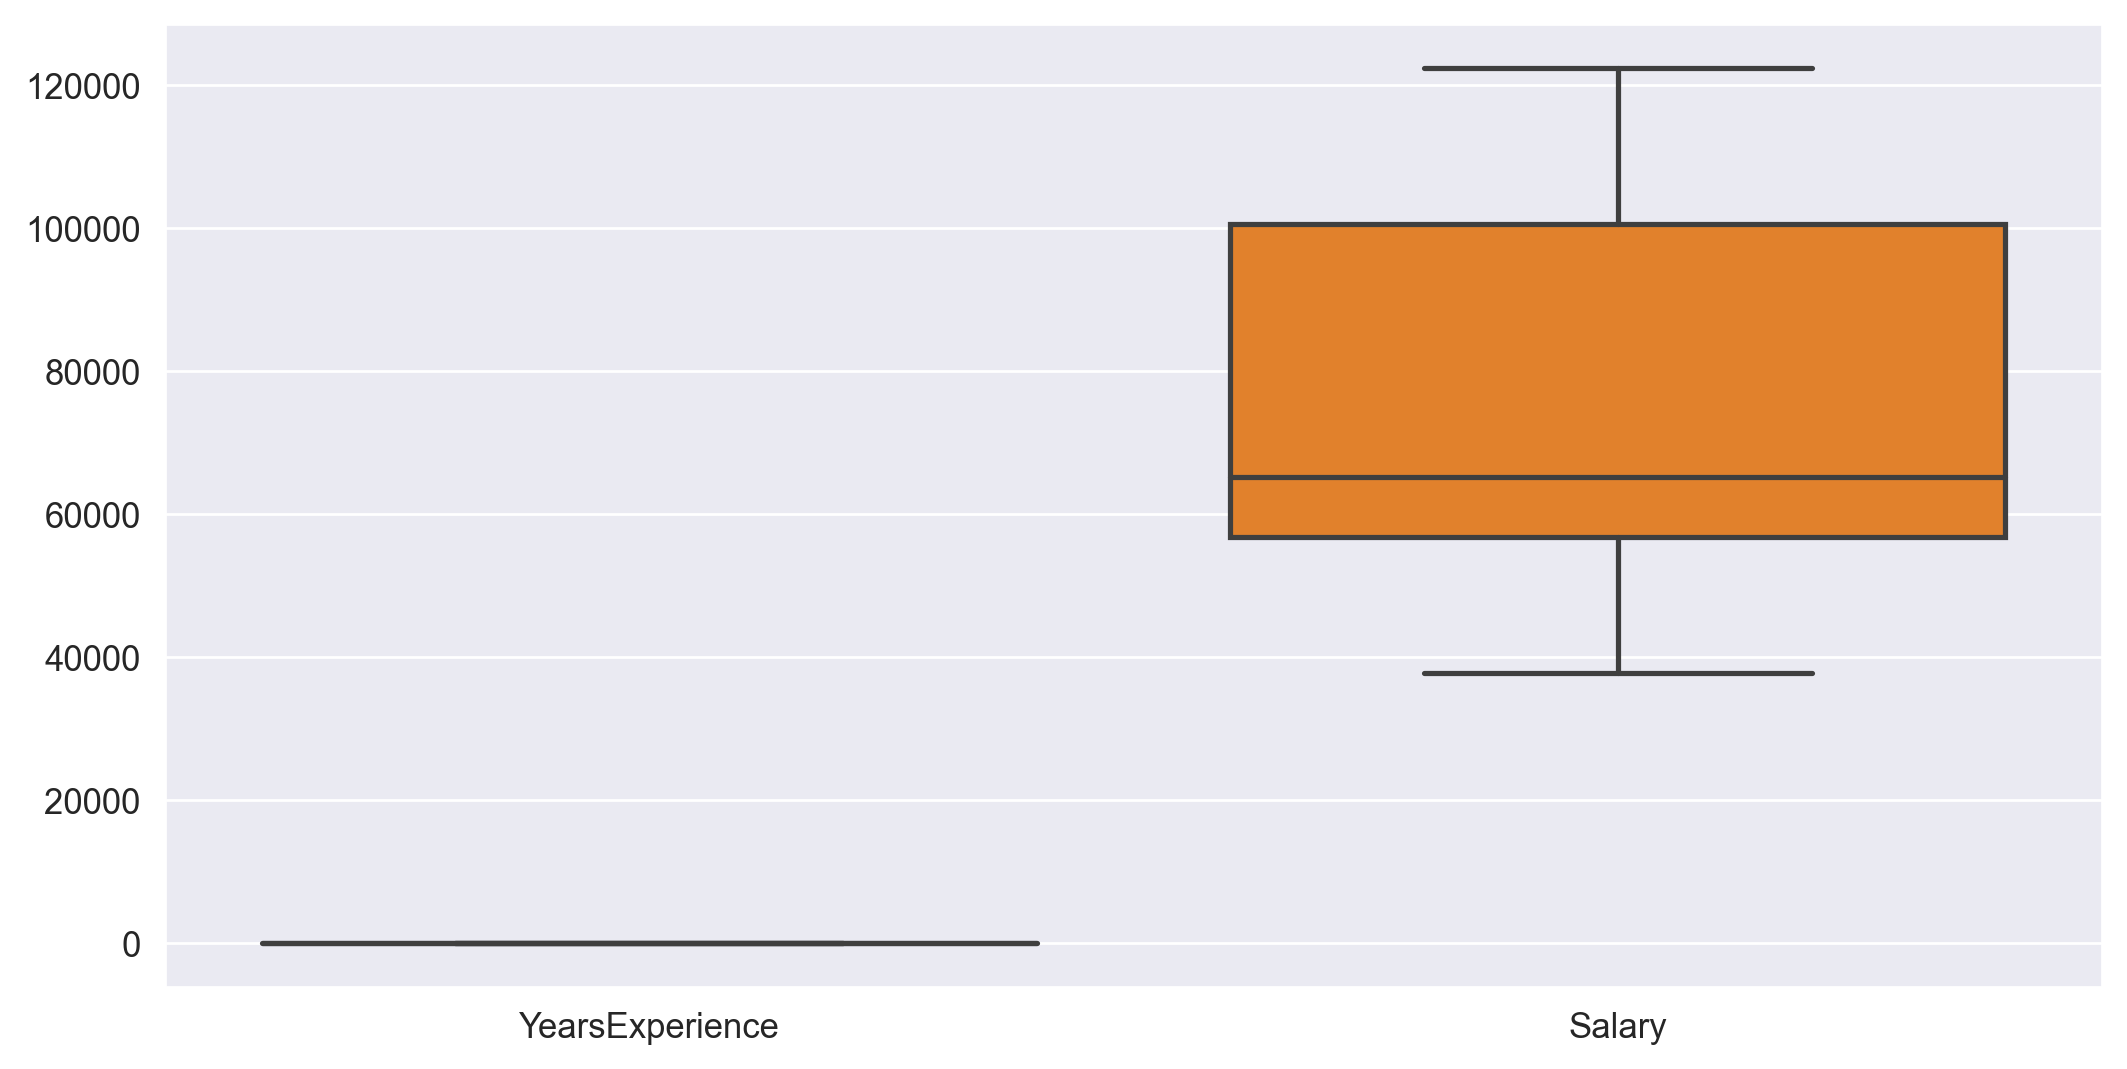

In [8]:
sns.boxplot(df)

<Axes: xlabel='YearsExperience', ylabel='Density'>

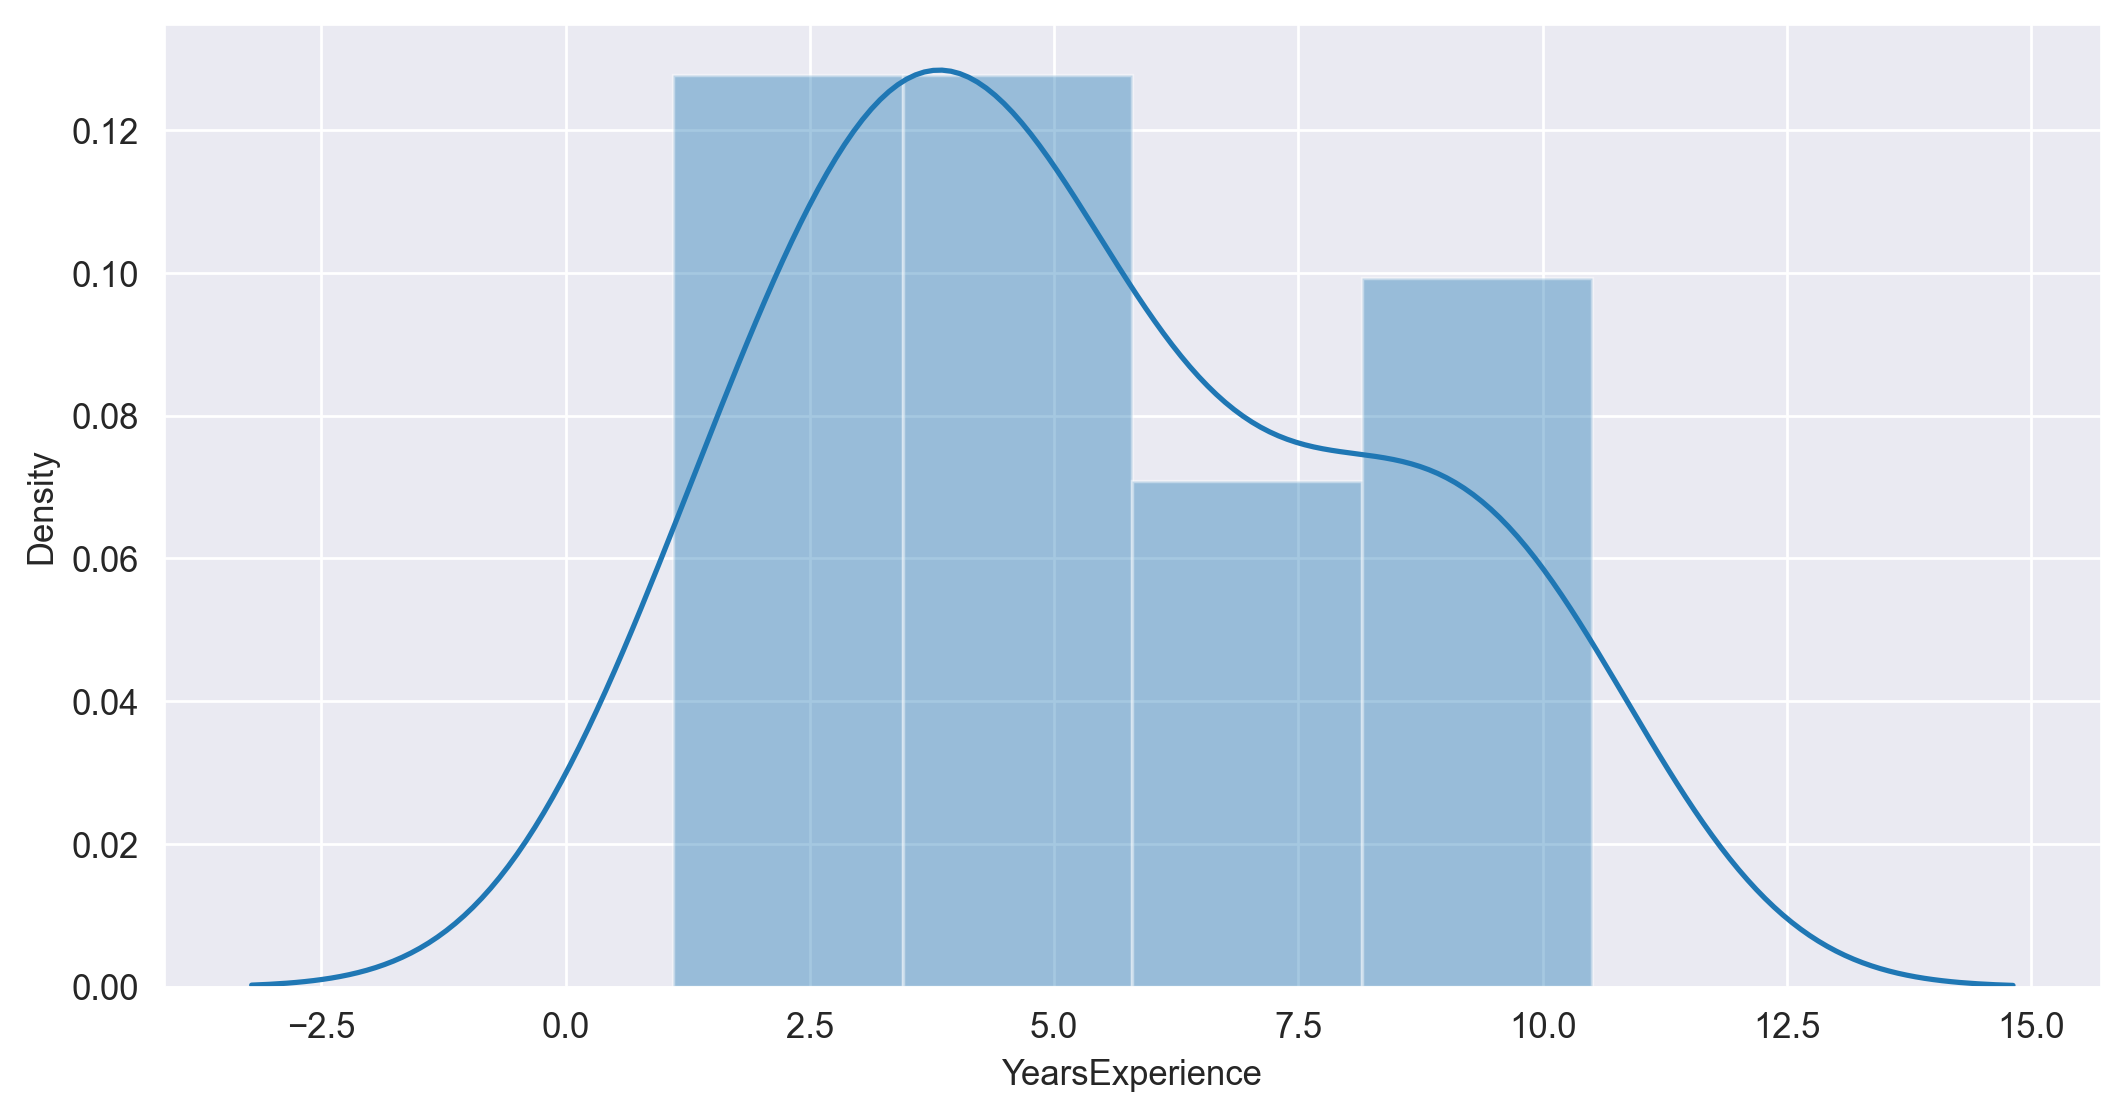

In [9]:
sns.distplot(df['YearsExperience'])

<Axes: xlabel='Salary', ylabel='Density'>

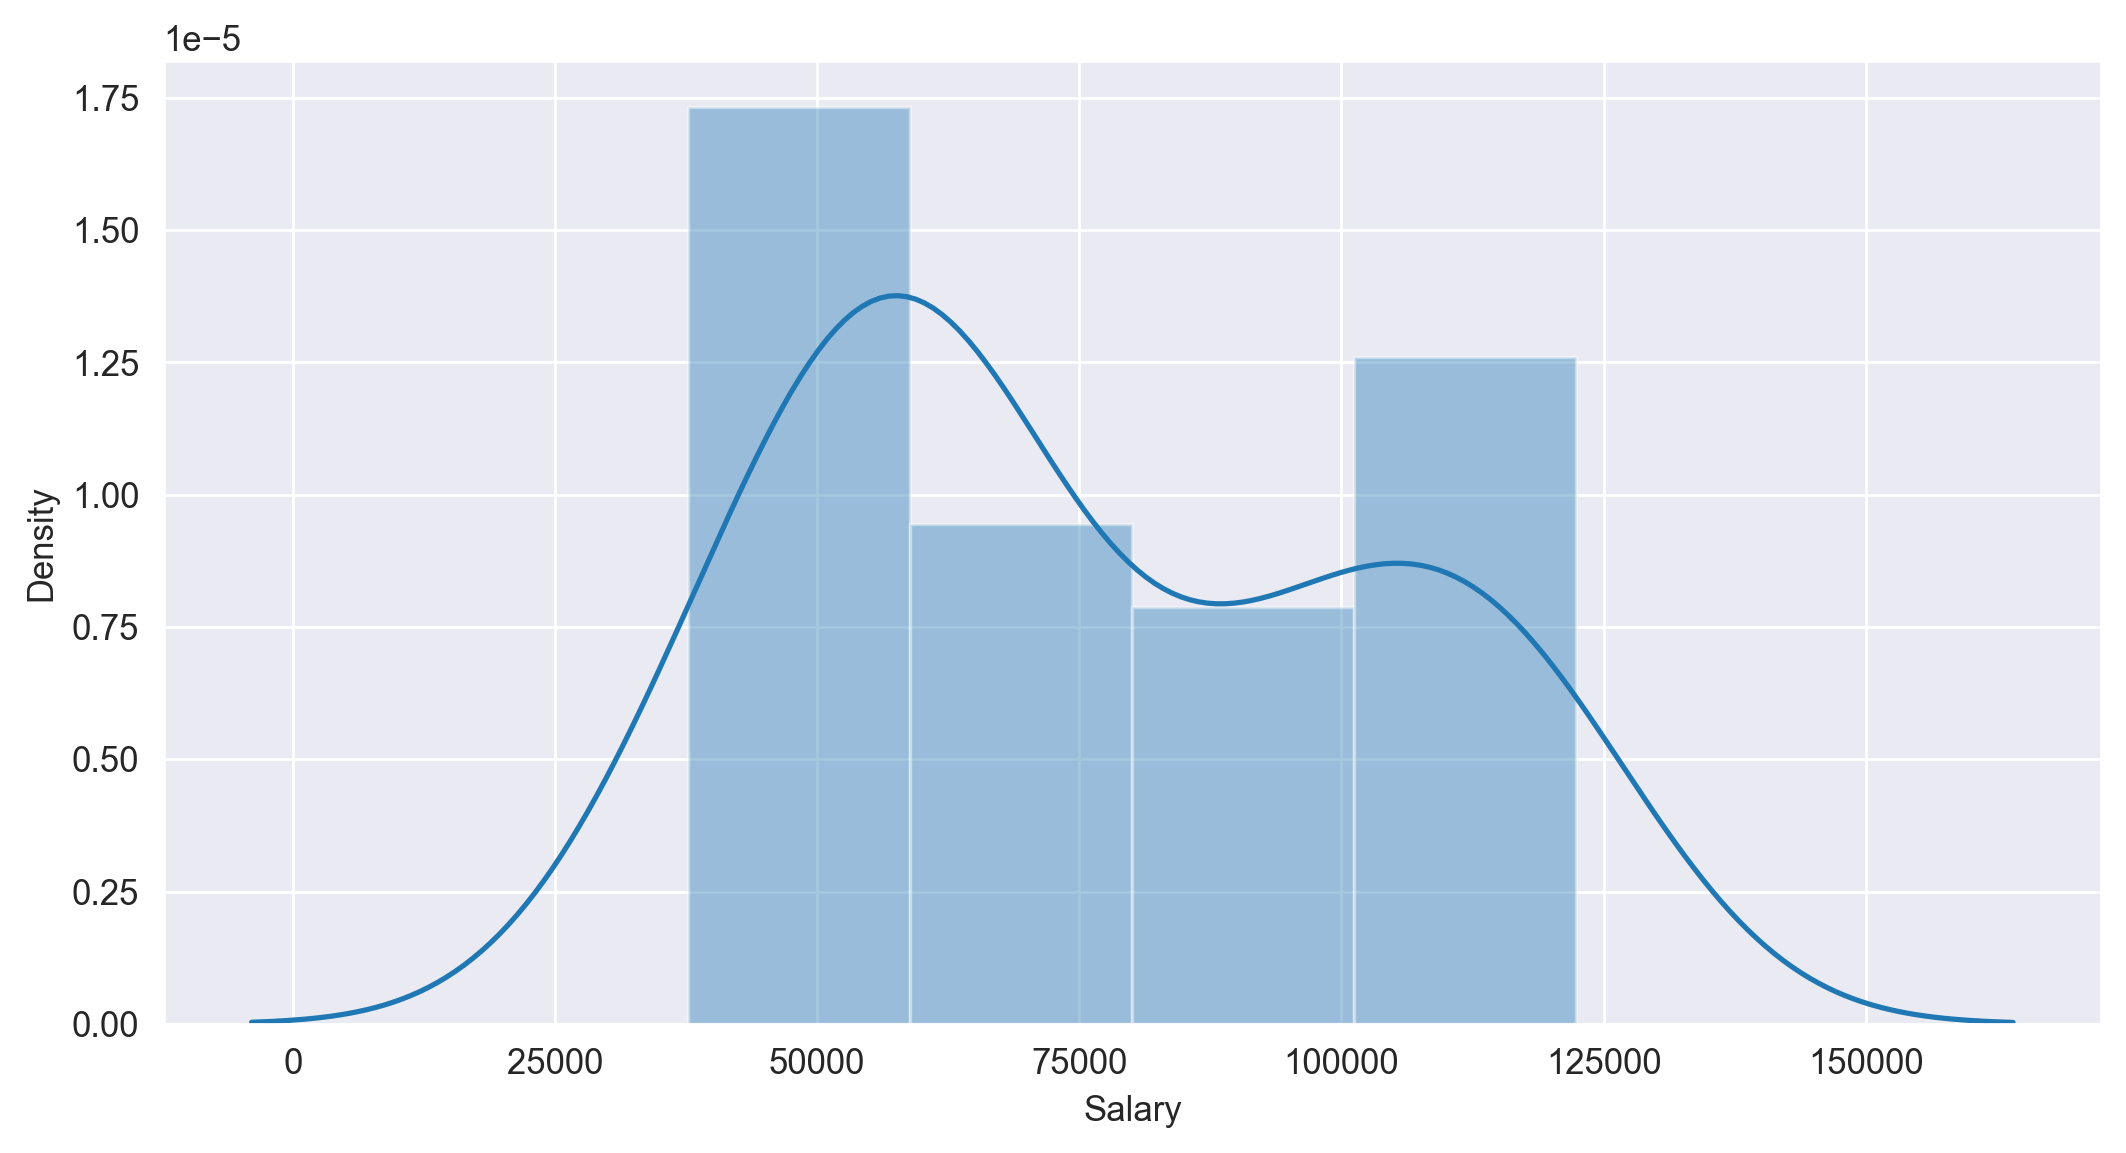

In [10]:
sns.distplot(df['Salary'])

### Correlation analysis

- There is a linear direct proportional relationship betweern year of experience and Salary
- Both columns have a strong correlation

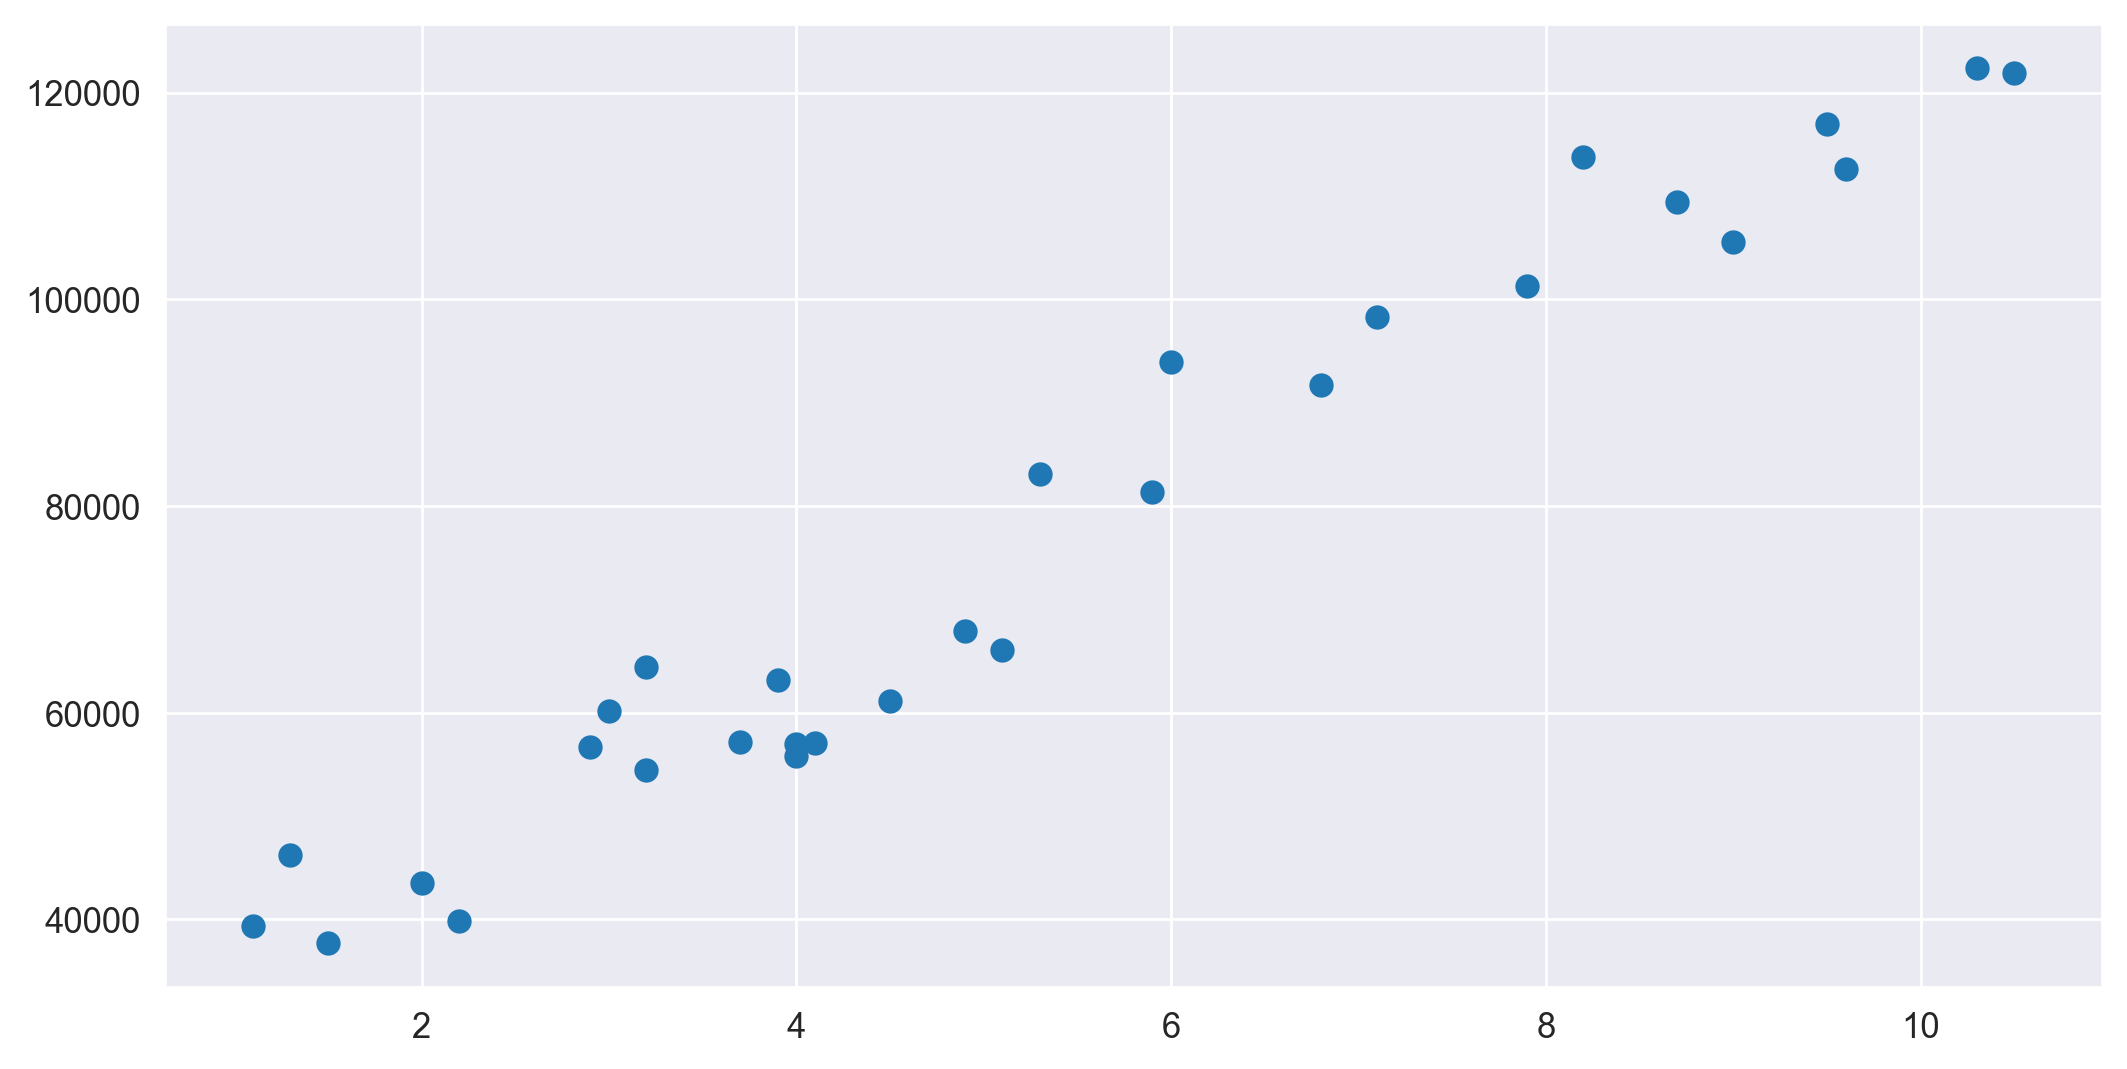

In [11]:
plt.scatter(df['YearsExperience'],df['Salary'])

In [12]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: >

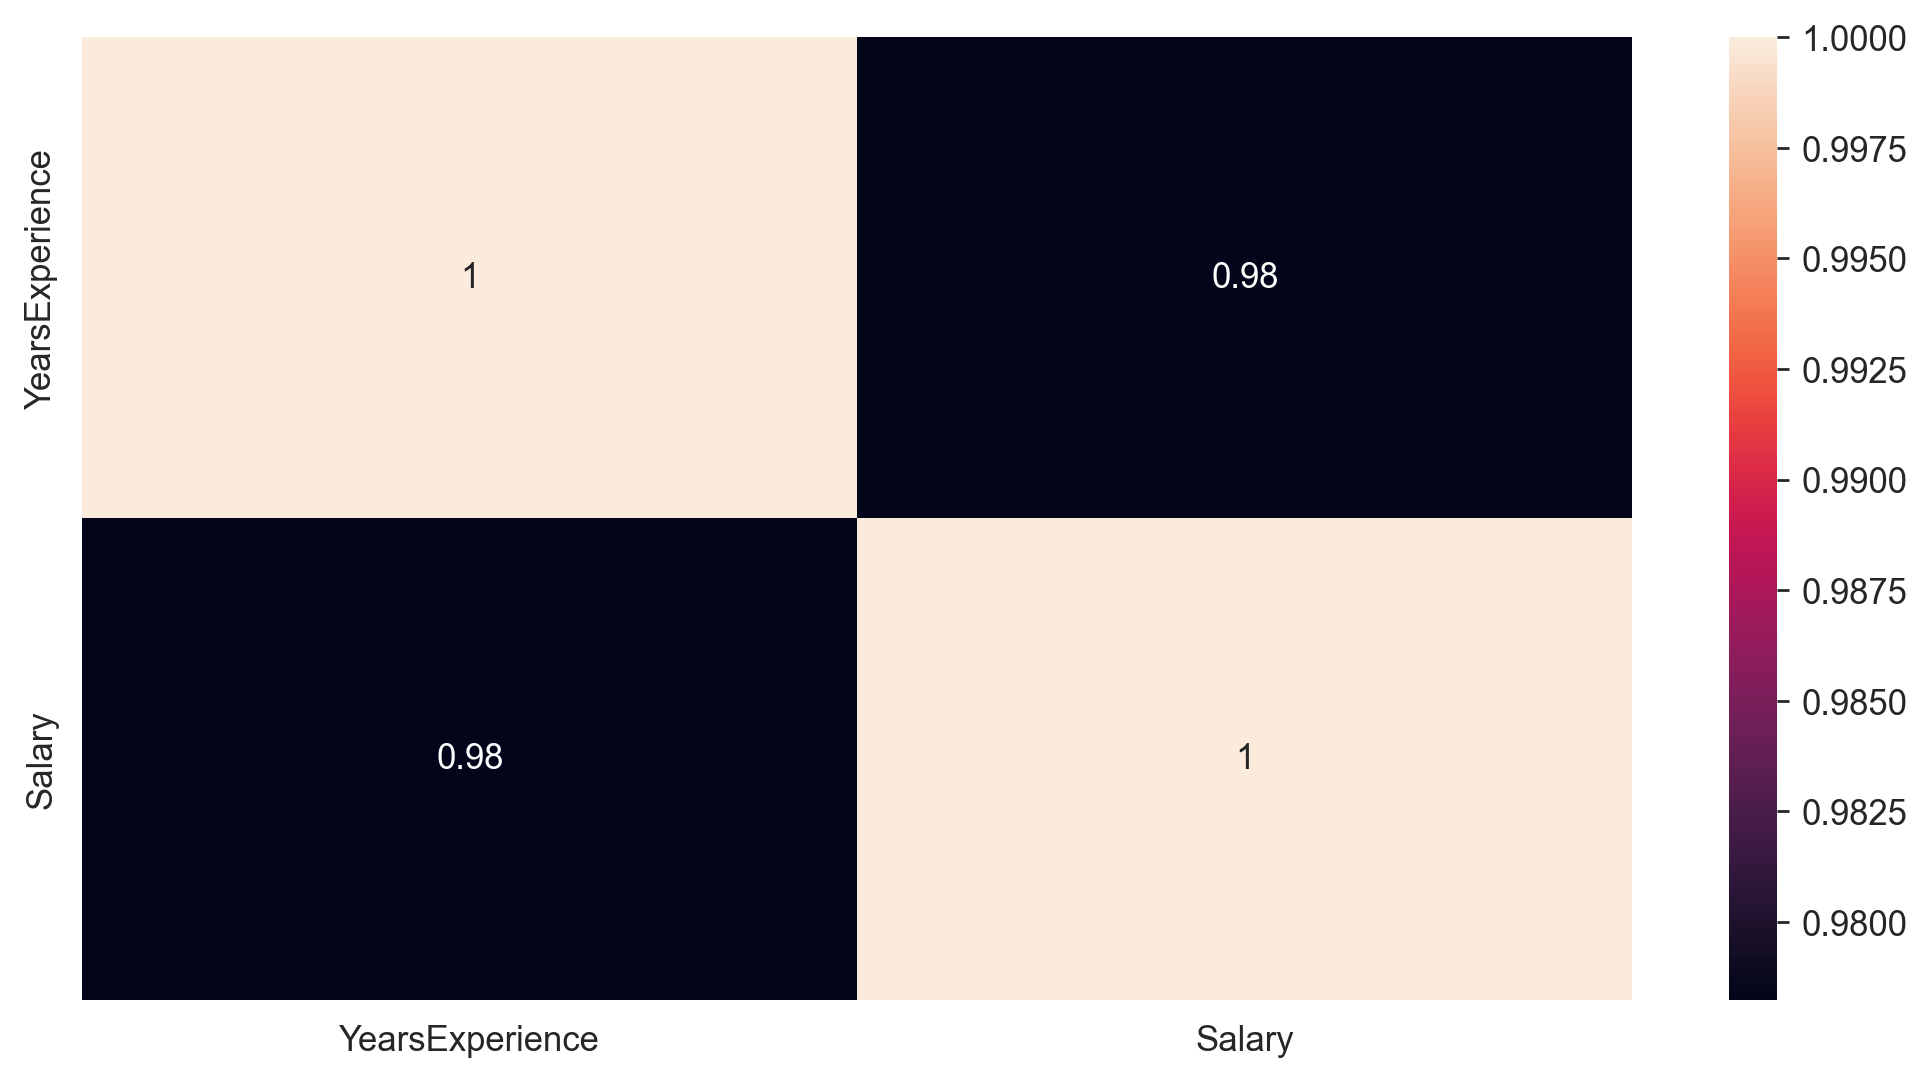

In [13]:
sns.heatmap(df.corr(),annot=True)

### Feature Engineering

In [14]:
x = df['YearsExperience'].values.reshape(-1, 1)
y = df['Salary']

In [15]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

## Transformations

In [16]:
x_log = np.log(x)
x_log

array([[0.09531018],
       [0.26236426],
       [0.40546511],
       [0.69314718],
       [0.78845736],
       [1.06471074],
       [1.09861229],
       [1.16315081],
       [1.16315081],
       [1.30833282],
       [1.36097655],
       [1.38629436],
       [1.38629436],
       [1.41098697],
       [1.5040774 ],
       [1.58923521],
       [1.62924054],
       [1.66770682],
       [1.77495235],
       [1.79175947],
       [1.91692261],
       [1.96009478],
       [2.06686276],
       [2.10413415],
       [2.16332303],
       [2.19722458],
       [2.2512918 ],
       [2.2617631 ],
       [2.3321439 ],
       [2.35137526]])

In [17]:
x_sqrt = np.sqrt(x)
x_sqrt

array([[1.04880885],
       [1.14017543],
       [1.22474487],
       [1.41421356],
       [1.4832397 ],
       [1.70293864],
       [1.73205081],
       [1.78885438],
       [1.78885438],
       [1.92353841],
       [1.97484177],
       [2.        ],
       [2.        ],
       [2.02484567],
       [2.12132034],
       [2.21359436],
       [2.25831796],
       [2.30217289],
       [2.42899156],
       [2.44948974],
       [2.60768096],
       [2.66458252],
       [2.81069386],
       [2.86356421],
       [2.94957624],
       [3.        ],
       [3.082207  ],
       [3.09838668],
       [3.20936131],
       [3.24037035]])

In [18]:
mx = MinMaxScaler()
x_minmax = mx.fit_transform(x)
x_minmax

array([[0.        ],
       [0.0212766 ],
       [0.04255319],
       [0.09574468],
       [0.11702128],
       [0.19148936],
       [0.20212766],
       [0.22340426],
       [0.22340426],
       [0.27659574],
       [0.29787234],
       [0.30851064],
       [0.30851064],
       [0.31914894],
       [0.36170213],
       [0.40425532],
       [0.42553191],
       [0.44680851],
       [0.5106383 ],
       [0.5212766 ],
       [0.60638298],
       [0.63829787],
       [0.72340426],
       [0.75531915],
       [0.80851064],
       [0.84042553],
       [0.89361702],
       [0.90425532],
       [0.9787234 ],
       [1.        ]])

In [19]:
x_reciprocal = 1/x
x_reciprocal

array([[0.90909091],
       [0.76923077],
       [0.66666667],
       [0.5       ],
       [0.45454545],
       [0.34482759],
       [0.33333333],
       [0.3125    ],
       [0.3125    ],
       [0.27027027],
       [0.25641026],
       [0.25      ],
       [0.25      ],
       [0.24390244],
       [0.22222222],
       [0.20408163],
       [0.19607843],
       [0.18867925],
       [0.16949153],
       [0.16666667],
       [0.14705882],
       [0.14084507],
       [0.12658228],
       [0.12195122],
       [0.11494253],
       [0.11111111],
       [0.10526316],
       [0.10416667],
       [0.09708738],
       [0.0952381 ]])

### Model Building
1. standard scaler

In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(x_scaled,y,test_size=0.2, random_state=1)

In [21]:
xtrain

array([[ 1.50049564],
       [-1.18749416],
       [ 1.21377673],
       [ 0.92705781],
       [ 1.03457741],
       [-1.11581443],
       [-1.36669348],
       [ 1.32129632],
       [-0.82909552],
       [ 0.21026054],
       [-0.43485702],
       [-0.75741579],
       [ 1.5363355 ],
       [-1.43837321],
       [-0.07645838],
       [-1.51005294],
       [-0.1481381 ],
       [ 1.85889428],
       [ 1.78721455],
       [-0.57821647],
       [-0.75741579],
       [-0.47069688],
       [-0.47069688],
       [-0.86493538]])

In [22]:
lr =LinearRegression()

In [23]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [24]:
ypred = lr.predict(xtest)

In [25]:
mean_squared_error(ytest,ypred)

51338023.49224842

In [26]:
np.sqrt(mean_squared_error(ytest,ypred))

7165.055721503387

In [27]:
R2_score =round(r2_score(ytest, ypred), 2)
R2_score

0.76

In [28]:
ypred

array([75074.50510972, 91873.8056381 , 62008.38247653, 81607.56642631,
       67608.14931932, 89073.92221671])

In [29]:
lr.predict([[2]])

array([127280.30687387])

### 2. log transformations

In [30]:
xtrainlog,xtestlog,ytrainlog,ytestlog = train_test_split(x_log,y,test_size=0.2, random_state=1)

In [31]:
xtrainlog

array([[2.2512918 ],
       [0.69314718],
       [2.16332303],
       [2.06686276],
       [2.10413415],
       [0.78845736],
       [0.40546511],
       [2.19722458],
       [1.09861229],
       [1.77495235],
       [1.41098697],
       [1.16315081],
       [2.2617631 ],
       [0.26236426],
       [1.62924054],
       [0.09531018],
       [1.58923521],
       [2.35137526],
       [2.3321439 ],
       [1.30833282],
       [1.16315081],
       [1.38629436],
       [1.38629436],
       [1.06471074]])

In [32]:
lr.fit(xtrainlog,ytrainlog)

LinearRegression()

In [33]:
ypredlog = lr.predict(xtestlog)

In [34]:
mean_squared_error(ytestlog,ypredlog)

56691522.78028432

In [35]:
np.sqrt(mean_squared_error(ytestlog,ypredlog))

7529.377316902396

In [36]:
R2_score =round(r2_score(ytestlog, ypredlog), 2)
R2_score

0.74

In [37]:
ypredlog

array([83043.63804717, 94810.5510764 , 70699.53079624, 88036.03482892,
       76458.50651274, 93073.12253947])

In [38]:
lr.predict([[2]])

array([96416.50366051])

### 3.sqrt transformation

In [39]:
xtrainsqrt,xtestsqrt,ytrainsqrt,ytestsqrt = train_test_split(x_sqrt,y,test_size=0.2, random_state=1)

In [40]:
xtrainsqrt

array([[3.082207  ],
       [1.41421356],
       [2.94957624],
       [2.81069386],
       [2.86356421],
       [1.4832397 ],
       [1.22474487],
       [3.        ],
       [1.73205081],
       [2.42899156],
       [2.02484567],
       [1.78885438],
       [3.09838668],
       [1.14017543],
       [2.25831796],
       [1.04880885],
       [2.21359436],
       [3.24037035],
       [3.20936131],
       [1.92353841],
       [1.78885438],
       [2.        ],
       [2.        ],
       [1.70293864]])

In [41]:
lr.fit(xtrainsqrt,ytrainsqrt)

LinearRegression()

In [42]:
ypredsqrt = lr.predict(xtestsqrt)

In [43]:
mean_squared_error(ytestsqrt,ypredsqrt)

37990754.86026753

In [44]:
np.sqrt(mean_squared_error(ytestsqrt,ypredsqrt))

6163.6640775002925

In [45]:
R2_score =round(r2_score(ytestsqrt, ypredsqrt), 2)
R2_score

0.82

In [46]:
ypredsqrt

array([79357.31375895, 94220.71022677, 65932.58165414, 85399.17535514,
       71940.06319255, 91887.02391356])

In [47]:
lr.predict([[2]])

array([66964.38869201])

### 4. Minmax scaler

In [48]:
xtrainminmax,xtestminmax,ytrainminmax,ytestminmax = train_test_split(x_minmax,y,test_size=0.2, random_state=1)

In [49]:
xtrainminmax

array([[0.89361702],
       [0.09574468],
       [0.80851064],
       [0.72340426],
       [0.75531915],
       [0.11702128],
       [0.04255319],
       [0.84042553],
       [0.20212766],
       [0.5106383 ],
       [0.31914894],
       [0.22340426],
       [0.90425532],
       [0.0212766 ],
       [0.42553191],
       [0.        ],
       [0.40425532],
       [1.        ],
       [0.9787234 ],
       [0.27659574],
       [0.22340426],
       [0.30851064],
       [0.30851064],
       [0.19148936]])

In [50]:
lr.fit(xtrainminmax,ytrainminmax)

LinearRegression()

In [51]:
ypredminmax = lr.predict(xtestminmax)

In [52]:
mean_squared_error(ytestminmax,ypredminmax)

51338023.49224839

In [53]:
np.sqrt(mean_squared_error(ytestminmax,ypredminmax))

7165.055721503385

In [54]:
R2_score =round(r2_score(ytestminmax, ypredminmax), 2)
R2_score

0.76

### 5. Reciprocal transform

In [55]:
xtrainr,xtestr,ytrainr,ytestr = train_test_split(x_reciprocal,y,test_size=0.2, random_state=1)

In [56]:
xtrainr

array([[0.10526316],
       [0.5       ],
       [0.11494253],
       [0.12658228],
       [0.12195122],
       [0.45454545],
       [0.66666667],
       [0.11111111],
       [0.33333333],
       [0.16949153],
       [0.24390244],
       [0.3125    ],
       [0.10416667],
       [0.76923077],
       [0.19607843],
       [0.90909091],
       [0.20408163],
       [0.0952381 ],
       [0.09708738],
       [0.27027027],
       [0.3125    ],
       [0.25      ],
       [0.25      ],
       [0.34482759]])

In [57]:
lr.fit(xtrainr,ytrainr)

LinearRegression()

In [58]:
ypredr = lr.predict(xtestr)

In [59]:
mean_squared_error(ytestr,ypredr)

129608804.0961581

In [60]:
np.sqrt(mean_squared_error(ytestr,ypredr))

11384.586250547629

In [61]:
R2_score =round(r2_score(ytestr, ypredr), 2)
R2_score

0.4

### Model Using stats model library

In [62]:
import statsmodels.formula.api as smf
model = smf.ols('Salary ~ YearsExperience' , data=df).fit()
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [63]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [64]:
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

## Delivery Data

In [65]:
delivery = pd.read_csv(r"C:\Users\shree\Desktop\subject\Data_Science\DS_Assignments\Datasets\delivery_time.csv")

In [66]:
delivery.shape

(21, 2)

In [67]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [68]:
delivery.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [69]:
delivery.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

### Descriptive Statistics

In [70]:
delivery.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<Axes: xlabel='Delivery Time', ylabel='Density'>

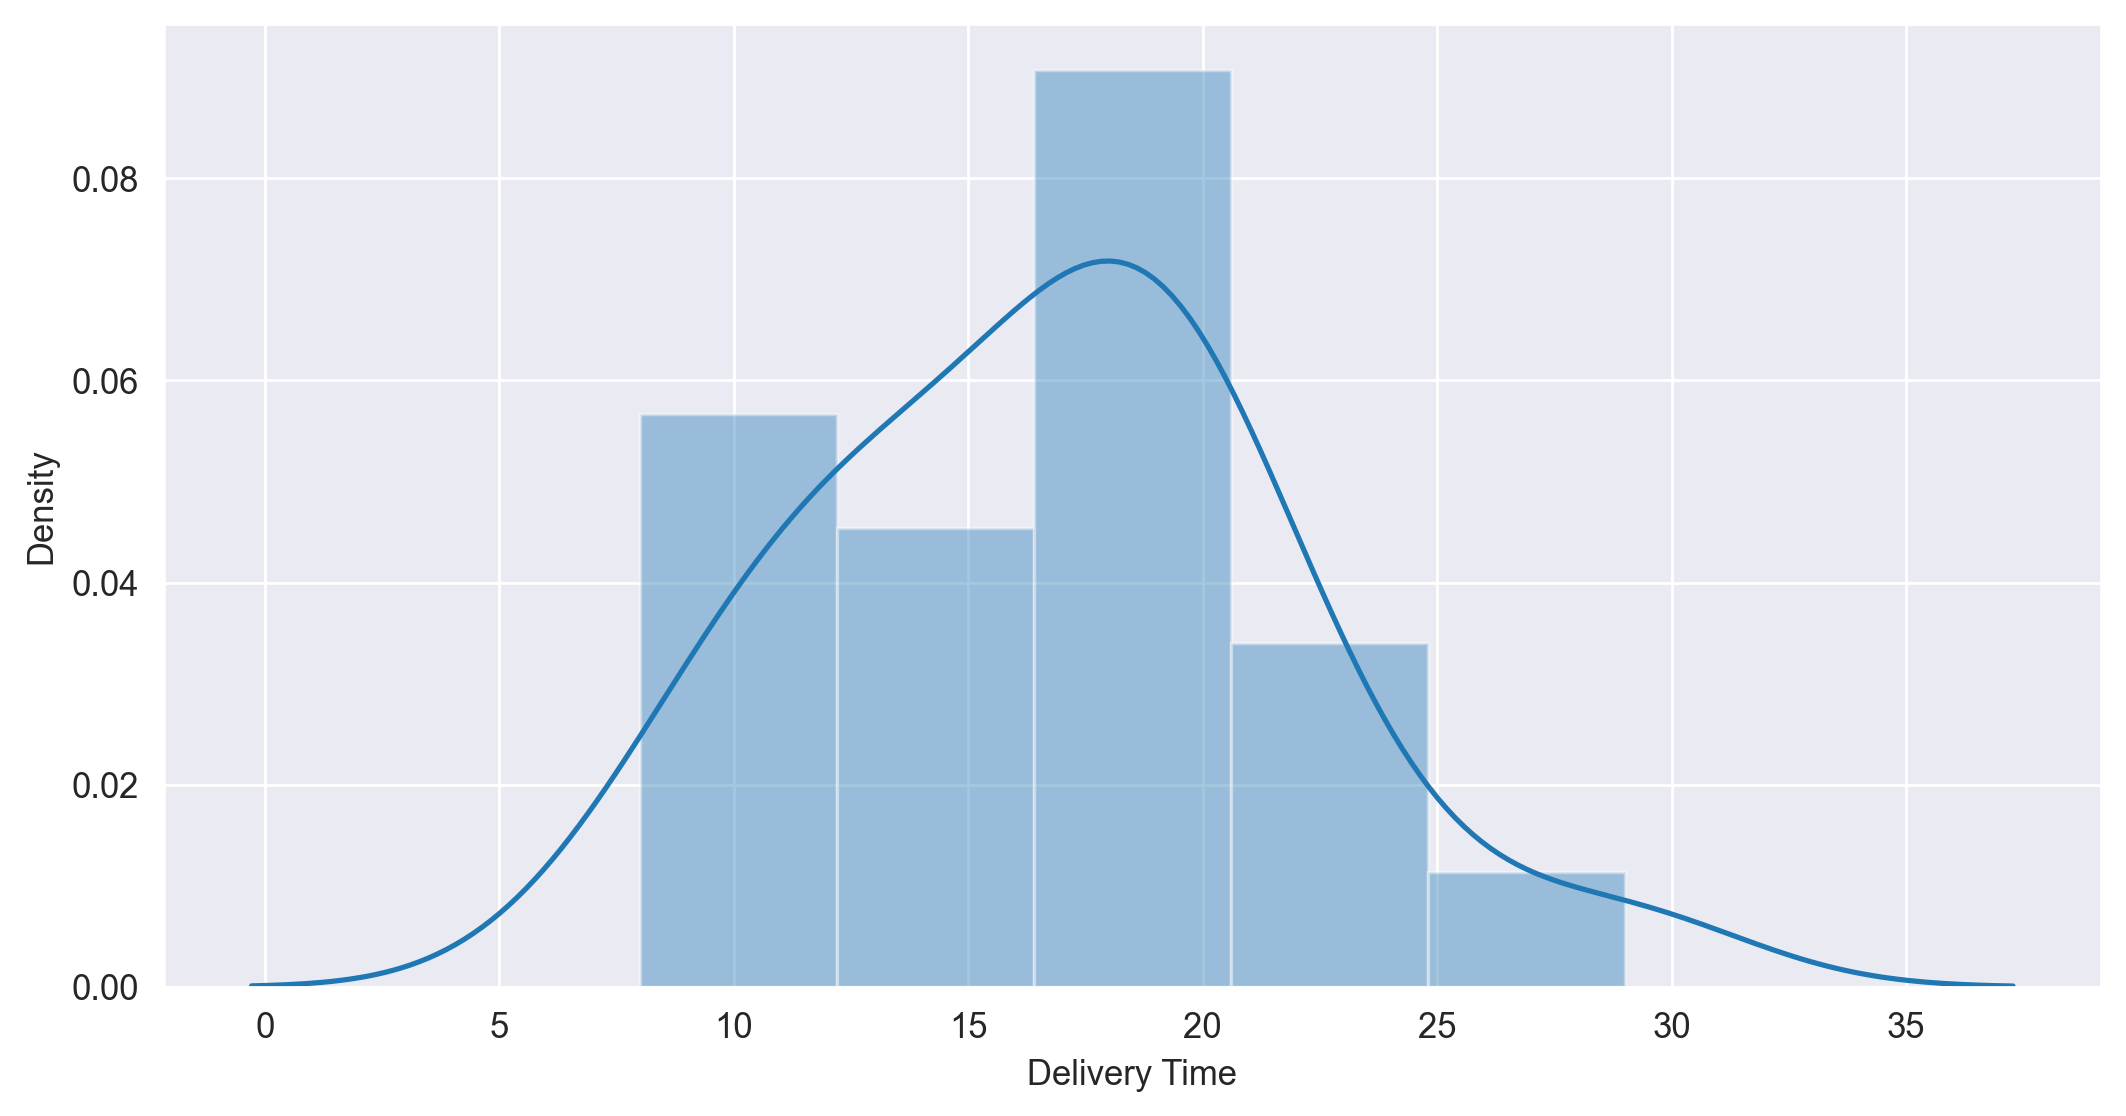

In [71]:
sns.distplot(delivery['Delivery Time'])

<Axes: xlabel='Sorting Time', ylabel='Density'>

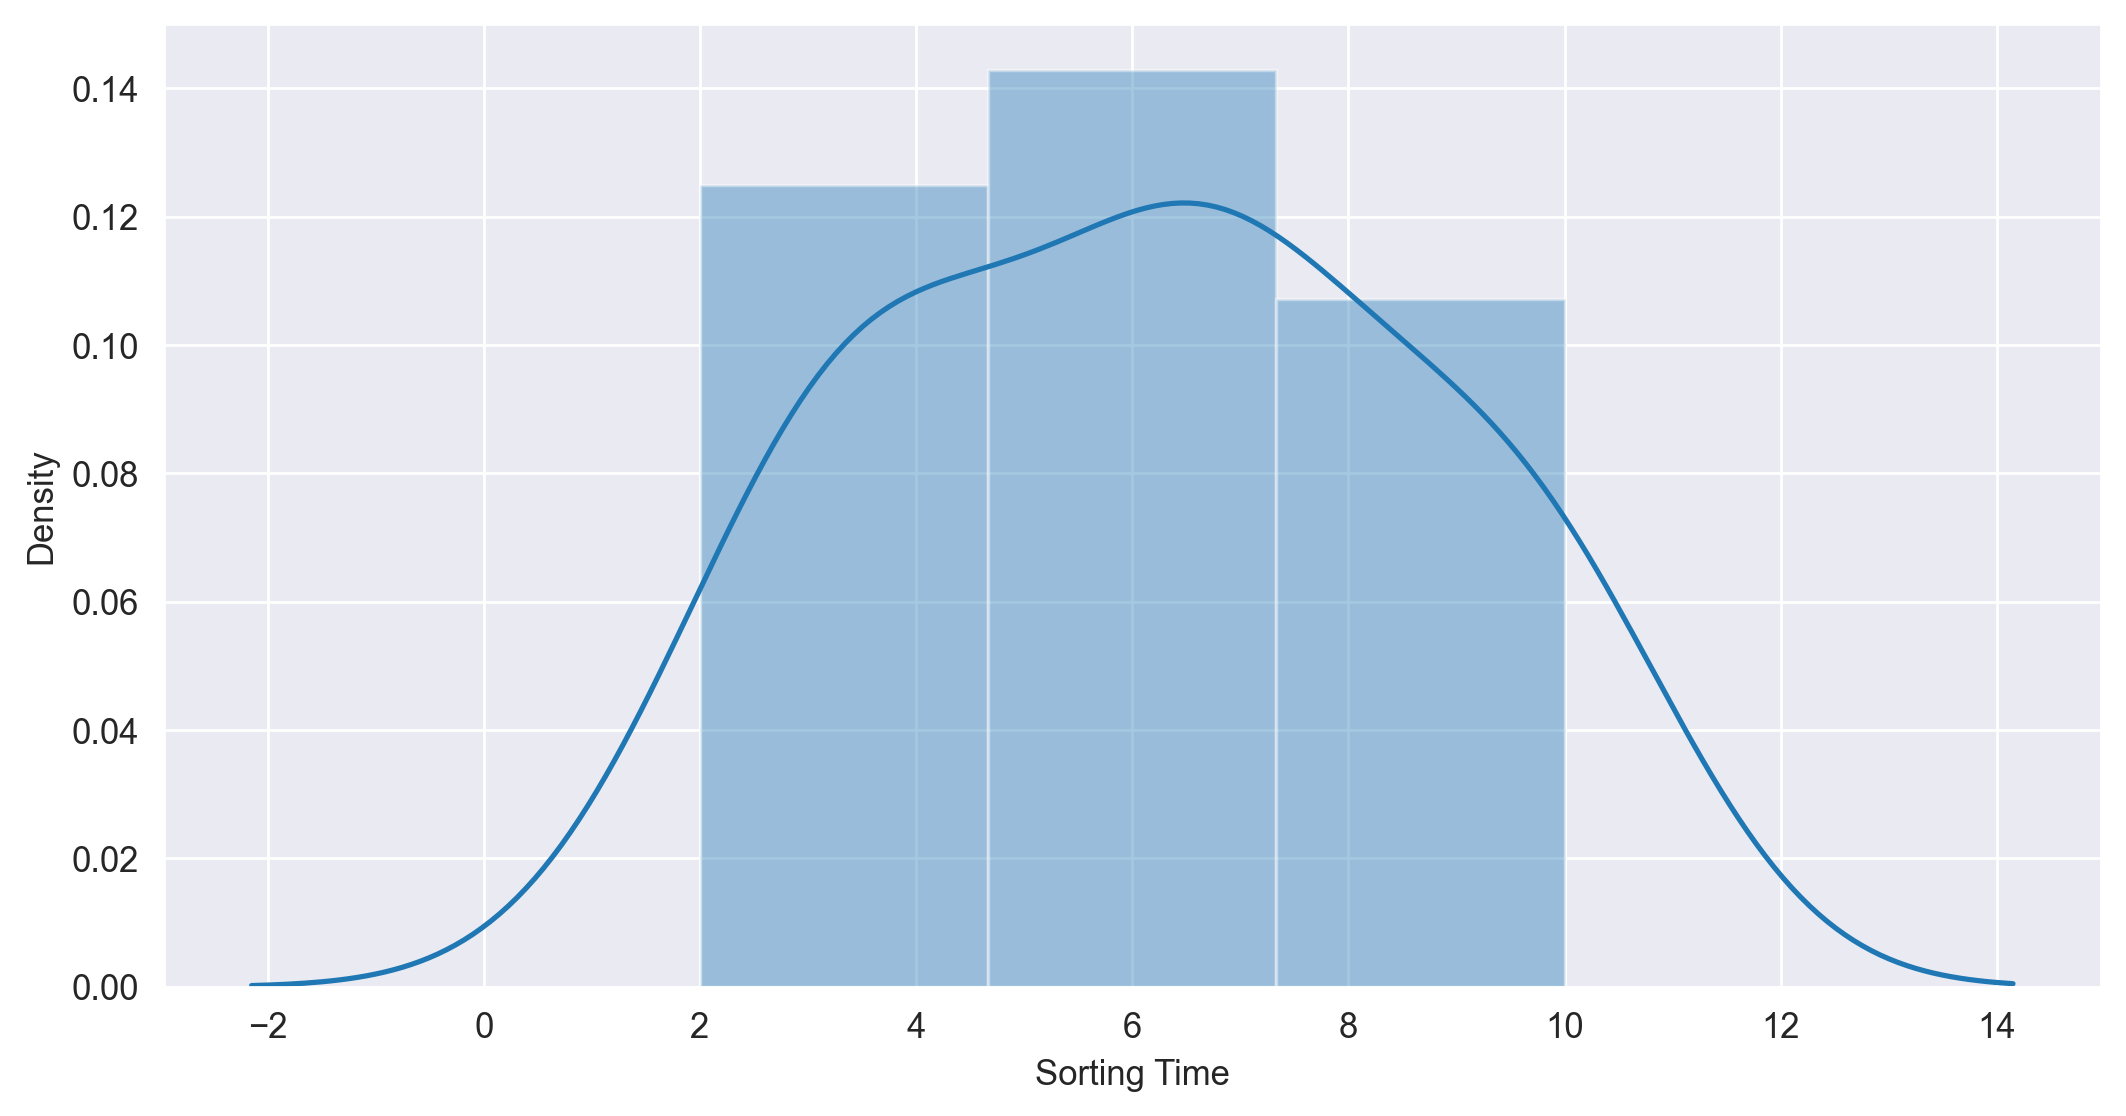

In [72]:
sns.distplot(delivery['Sorting Time'])

### Correlation Analysis

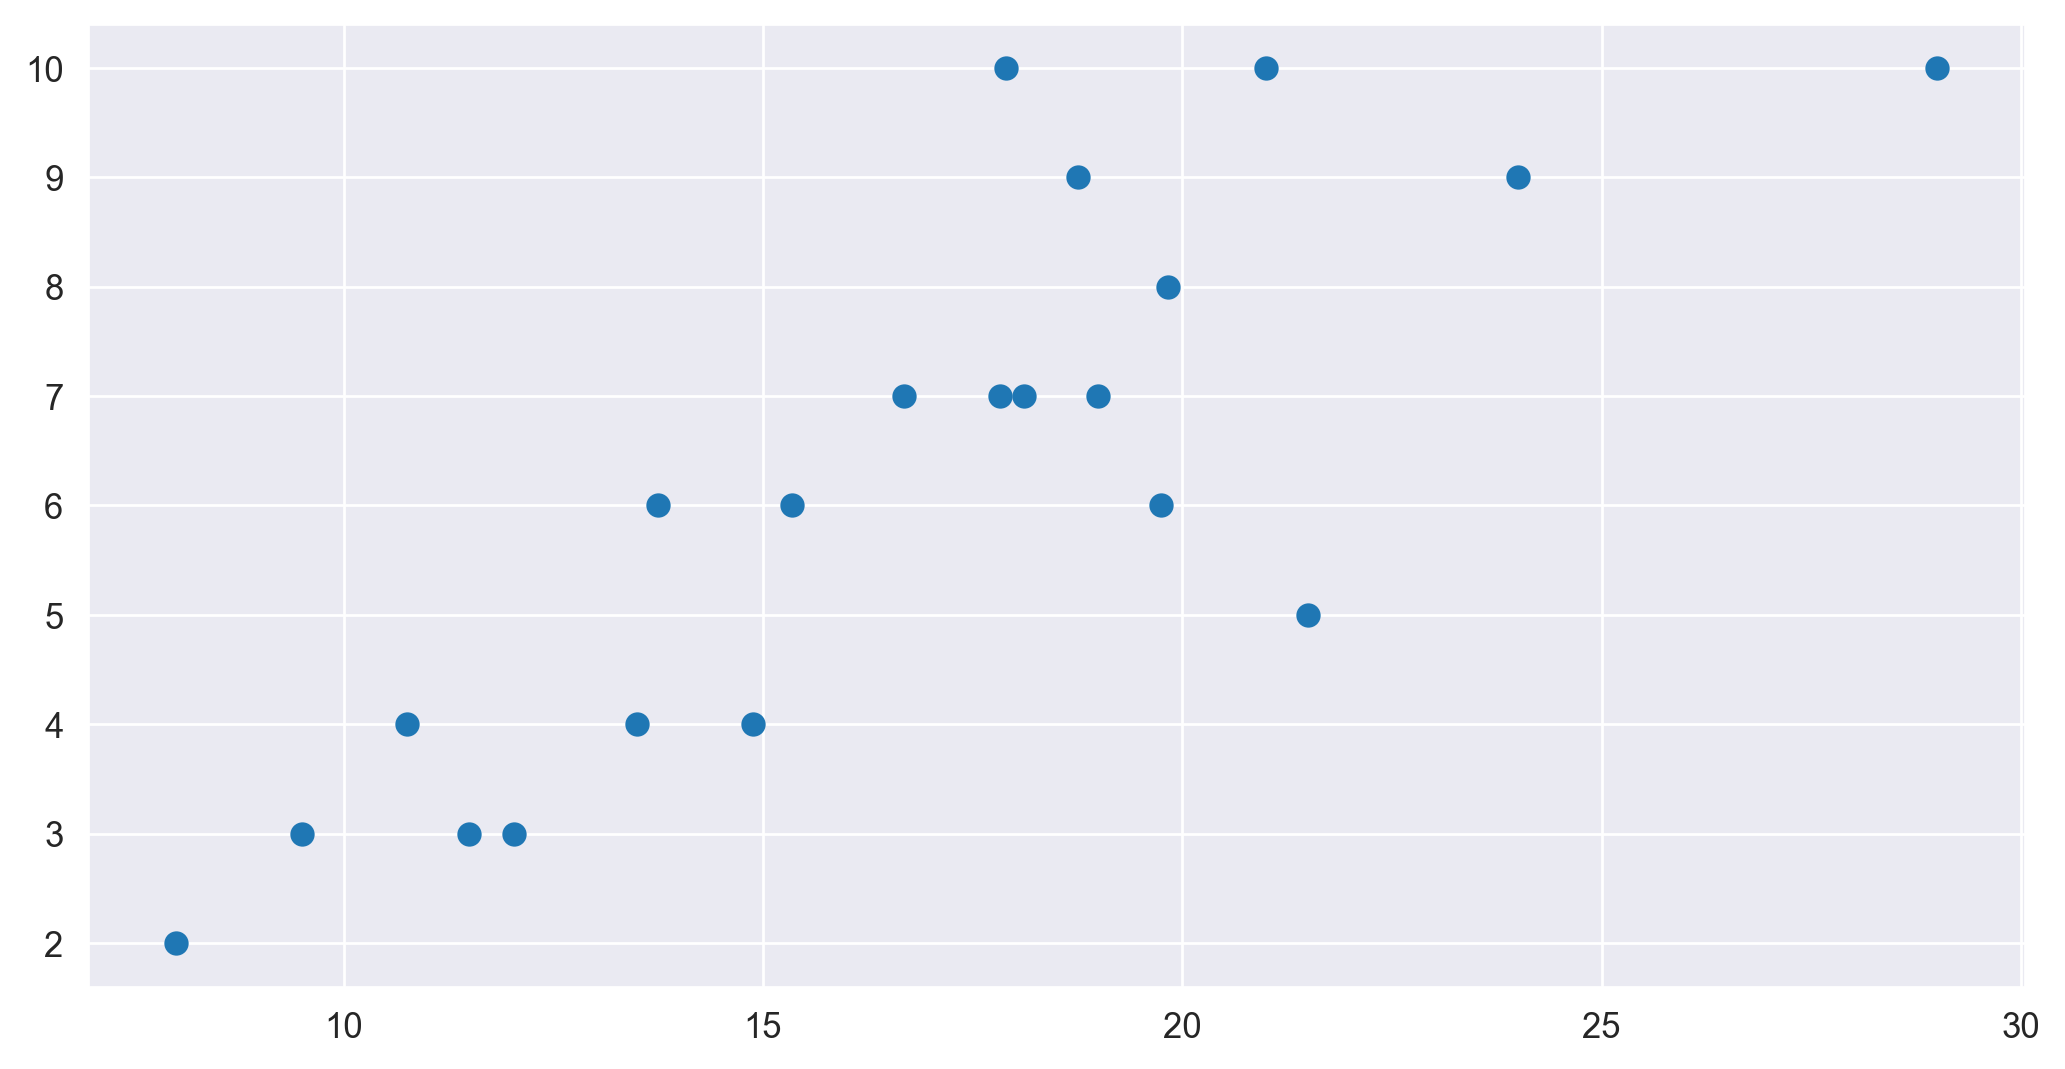

In [73]:
plt.scatter(delivery['Delivery Time'],delivery['Sorting Time'])

In [74]:
delivery.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<Axes: >

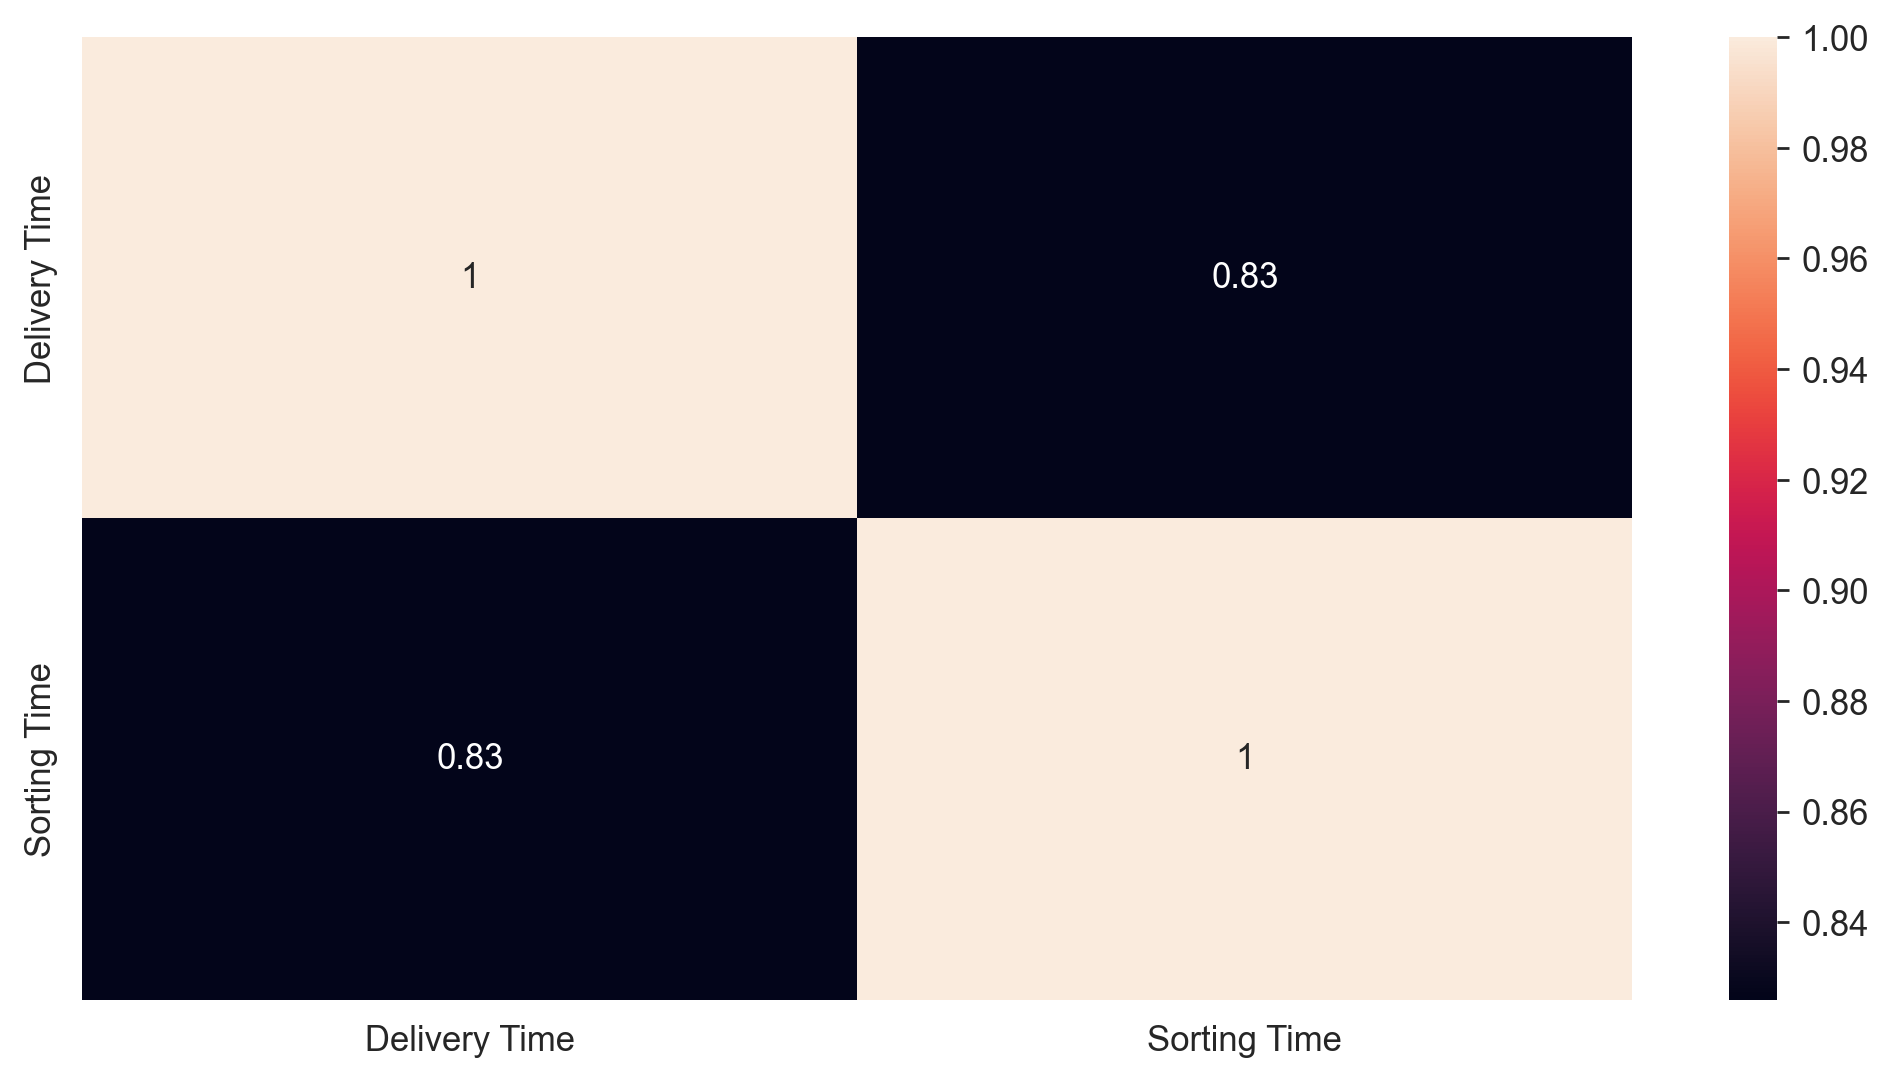

In [75]:
sns.heatmap(delivery.corr(), annot = True)

### Model Building

In [76]:
x = delivery['Sorting Time'].values.reshape(-1, 1)
y = delivery['Delivery Time']

1. StandardScaler 

In [77]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [78]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [79]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [80]:
lr.predict(xtest)

array([13.29502632, 19.41386842, 20.94357895, 10.23560526, 17.88415789])

In [81]:
ypred = lr.predict(xtest)

In [82]:
mean_squared_error(ytest,ypred)

3.4151904541551152

In [83]:
np.sqrt(mean_squared_error(ytest,ypred))

1.8480233911276975

In [84]:
R2_score =round(r2_score(ytest, ypred), 2)
R2_score

0.88

In [85]:
lr.predict([[7]])

array([43.2097872])

2. Log transformation

In [86]:
x_log = pd.DataFrame(np.log(x))
x_log.replace(np.nan,0,inplace = True)
x_log

,0
0,0.428937
1,0.000000
2,0.000000
3,0.124448
4,0.428937
5,0.000000
6,-1.119876
7,0.000000
8,0.428937
9,0.124448


In [87]:
xtrainlog,xtestlog,ytrainlog,ytestlog = train_test_split(x_log,y,test_size=0.2, random_state=1)

In [88]:
lr = LinearRegression()
lr.fit(xtrainlog,ytrainlog)

LinearRegression()

In [89]:
lr.predict(xtestlog)

array([16.86015697, 16.5407442 , 16.98614707, 16.86015697, 15.72640412])

In [90]:
ypredlog = lr.predict(xtestlog)

In [91]:
mean_squared_error(ytestlog,ypredlog)

29.623653820738763

In [92]:
np.sqrt(mean_squared_error(ytestlog,ypredlog))

5.442761598741834

In [93]:
R2_score =round(r2_score(ytestlog, ypredlog), 2)
R2_score

-0.03

3. sqrt transformation

In [94]:
x_sqrt = pd.DataFrame(np.sqrt(x))
x_sqrt.replace(np.nan,0,inplace = True)
x_sqrt

,0
0,1.239203
1,0.000000
2,0.000000
3,1.064201
4,1.239203
5,0.000000
6,0.571244
7,0.000000
8,1.239203
9,1.064201


In [95]:
xtrainsqrt,xtestsqrt,ytrainsqrt,ytestsqrt = train_test_split(x_sqrt,y,test_size=0.2, random_state=1)

In [96]:
lr = LinearRegression()
lr.fit(xtrainsqrt,ytrainsqrt)

LinearRegression()

In [97]:
lr.predict(xtestsqrt)

array([14.15584636, 19.58568135, 20.92167259, 14.15584636, 17.78762437])

In [98]:
ypredsqrt = lr.predict(xtestsqrt)

In [99]:
mean_squared_error(ytestsqrt,ypredsqrt)

9.611712033714252

In [100]:
np.sqrt(mean_squared_error(ytestsqrt,ypredsqrt))

3.1002761221727093

In [101]:
R2_score =round(r2_score(ytestsqrt, ypredsqrt), 2)
R2_score

0.67

4. minmax transformation

In [102]:
mx = MinMaxScaler()
x_minmax = mx.fit_transform(x)
x_minmax

array([[1.   ],
       [0.25 ],
       [0.5  ],
       [0.875],
       [1.   ],
       [0.5  ],
       [0.625],
       [0.125],
       [1.   ],
       [0.875],
       [0.75 ],
       [0.25 ],
       [0.625],
       [0.125],
       [0.125],
       [0.25 ],
       [0.5  ],
       [0.625],
       [0.   ],
       [0.625],
       [0.375]])

In [103]:
xtrainminmax,xtestminmax,ytrainminmax,ytestminmax = train_test_split(x_minmax,y,test_size=0.2, random_state=1)

In [104]:
lr = LinearRegression()
lr.fit(xtrainminmax,ytrainminmax)

LinearRegression()

In [105]:
lr.predict(xtestminmax)

array([13.29502632, 19.41386842, 20.94357895, 10.23560526, 17.88415789])

In [106]:
ypredminmax = lr.predict(xtestminmax)

In [107]:
mean_squared_error(ytestminmax,ypredminmax)

3.415190454155124

In [108]:
np.sqrt(mean_squared_error(ytestminmax,ypredminmax))

1.8480233911277

In [109]:
R2_score =round(r2_score(ytestminmax, ypredminmax), 2)
R2_score

0.88

5. Reciprocal Transformation

In [110]:
x_reciprocal = 1/x
x_reciprocal

array([[  0.65120081],
       [ -1.13252315],
       [-13.02401628],
       [  0.88298415],
       [  0.65120081],
       [-13.02401628],
       [  3.06447442],
       [ -0.77755321],
       [  0.65120081],
       [  0.88298415],
       [  1.37094908],
       [ -1.13252315],
       [  3.06447442],
       [ -0.77755321],
       [ -0.77755321],
       [ -1.13252315],
       [-13.02401628],
       [  3.06447442],
       [ -0.59200074],
       [  3.06447442],
       [ -2.0838426 ]])

In [111]:
xtrainr,xtestr,ytrainr,ytestr = train_test_split(x_reciprocal,y,test_size=0.2, random_state=1)

In [112]:
lr = LinearRegression()
lr.fit(xtrainr,ytrainr)

LinearRegression()

In [113]:
lr.predict(xtestr)

array([16.84939677, 17.13825528, 17.08195235, 16.91176395, 17.33365956])

In [114]:
ypredr = lr.predict(xtestr)

In [115]:
mean_squared_error(ytestr,ypredr)

27.801127544157197

In [116]:
np.sqrt(mean_squared_error(ytestr,ypredr))

5.272677454970785

In [117]:
R2_score =round(r2_score(ytestr, ypredr), 2)
R2_score

0.03

### Model built using Statsmodel library

In [118]:
delivery_renamed = delivery.rename(columns = {'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'})

In [119]:
delivery_renamed

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [120]:
import statsmodels.formula.api as smf
model = smf.ols('Delivery_Time~Sorting_Time' , data=delivery_renamed).fit()
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [121]:
model.pvalues

Intercept       0.001147
Sorting_Time    0.000004
dtype: float64

In [122]:
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)